In [1]:
# ======================================================
# REGRESSION TASK 0: Setup + Load Dataset (VS CODE)
# Dataset: rent_kuala_lumpur.csv
# Target: monthly_rent
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# LOAD DATASET (CSV MUST BE IN SAME FOLDER)
df = pd.read_csv("rent_kuala_lumpur.csv")

print("Shape:", df.shape)
print("\nHEAD:")
print(df.head())

print("\nColumns:")
print(df.columns.tolist())

print("\nTarget nulls:", df["monthly_rent"].isna().sum())


Shape: (19991, 14)

HEAD:
      ads_id                      prop_name  completion_year  monthly_rent  \
0  100323185       The Hipster @ Taman Desa           2022.0        4200.0   
1  100203973                   Segar Courts              NaN        2300.0   
2  100323128  Pangsapuri Teratak Muhibbah 2              NaN        1000.0   
3  100191767   Sentul Point Suite Apartment           2020.0        1700.0   
4   97022692                Arte Mont Kiara              NaN        1299.0   

                    location      property_type  rooms  parking  bathroom  \
0  Kuala Lumpur - Taman Desa        Condominium    5.0      2.0       6.0   
1      Kuala Lumpur - Cheras        Condominium    3.0      1.0       2.0   
2  Kuala Lumpur - Taman Desa          Apartment    3.0      NaN       2.0   
3      Kuala Lumpur - Sentul          Apartment    2.0      1.0       2.0   
4  Kuala Lumpur - Mont Kiara  Service Residence    1.0      1.0       1.0   

     size            furnished  \
0  1842.

ORIGINAL SHAPE: (19991, 14)

INFO:
<class 'pandas.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  str    
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  float64
 4   location               19991 non-null  str    
 5   property_type          19991 non-null  str    
 6   rooms                  19985 non-null  float64
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  float64
 10  furnished              19986 non-null  str    
 11  facilities             17782 non-null  str    
 12  additional_facilities  14043 non-null  str    
 13  region                 19991 non-null  str    
dtypes: float64(6), int64(1), str(7

,ads_id,completion_year,monthly_rent,rooms,parking,bathroom,size
count,1.999100e+04,10806.000000,1.998900e+04,19985.000000,14289.000000,19985.000000,1.999100e+04
mean,9.970671e+07,2014.822321,2.269084e+03,2.681011,1.416824,1.891719,5.922172e+03
std,3.482575e+06,6.735355,2.241285e+04,0.811109,0.567368,0.556266,7.072596e+05
min,1.652551e+07,1977.000000,7.000000e+01,1.000000,1.000000,1.000000,1.000000e+00
25%,9.984012e+07,2012.000000,1.100000e+03,2.000000,1.000000,2.000000,7.500000e+02
50%,1.002127e+08,2017.000000,1.400000e+03,3.000000,1.000000,2.000000,8.860000e+02
75%,1.006179e+08,2020.000000,1.800000e+03,3.000000,2.000000,2.000000,1.044000e+03
max,1.008546e+08,2025.000000,2.400000e+06,10.000000,10.000000,8.000000,1.000000e+08


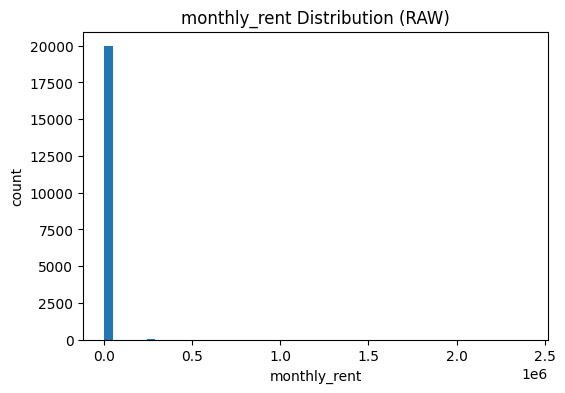


AFTER CLEANING SHAPE: (19794, 14)


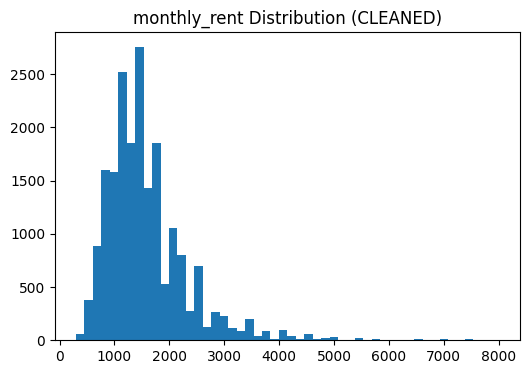


FINAL SHAPE USED FOR MODELING: (19794, 17)


,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,size_log,property_age,rooms_per_1000sqft
0,100323185,The Hipster @ Taman Desa,2022.0,4200.0,Kuala Lumpur - Taman Desa,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,7.519150,4.0,2.714441
1,100203973,Segar Courts,NaN,2300.0,Kuala Lumpur - Cheras,Condominium,3.0,1.0,2.0,1170.0,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,7.065613,NaN,2.564103
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Kuala Lumpur - Taman Desa,Apartment,3.0,NaN,2.0,650.0,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,6.478510,NaN,4.615385
3,100191767,Sentul Point Suite Apartment,2020.0,1700.0,Kuala Lumpur - Sentul,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,6.612041,6.0,2.691790
4,97022692,Arte Mont Kiara,NaN,1299.0,Kuala Lumpur - Mont Kiara,Service Residence,1.0,1.0,1.0,494.0,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,6.204558,NaN,2.024291


REGRESSION TASK 1 COMPLETED


In [2]:
# ======================================================
# REGRESSION TASK 1: EDA + Cleaning + Feature Engineering
# ======================================================

from IPython.display import display

print("ORIGINAL SHAPE:", df.shape)

# INFO
print("\nINFO:")
df.info()

# Missing values
print("\nMISSING VALUES (TOP 15):")
print(df.isna().sum().sort_values(ascending=False).head(15))

# Summary
print("\nNUMERIC SUMMARY:")
display(df.describe())

# Target distribution (RAW)
plt.figure(figsize=(6,4))
plt.hist(df["monthly_rent"].dropna(), bins=50)
plt.title("monthly_rent Distribution (RAW)")
plt.xlabel("monthly_rent")
plt.ylabel("count")
plt.show()

# -----------------------------
# CLEANING
# -----------------------------
df_clean = df.copy()

# Drop missing target
df_clean = df_clean.dropna(subset=["monthly_rent"])

# Remove unrealistic rent values
df_clean = df_clean[df_clean["monthly_rent"].between(300, 8000)]

# Size outliers
if "size" in df_clean.columns:
    df_clean = df_clean[df_clean["size"].between(150, 5000)]

print("\nAFTER CLEANING SHAPE:", df_clean.shape)

plt.figure(figsize=(6,4))
plt.hist(df_clean["monthly_rent"], bins=50)
plt.title("monthly_rent Distribution (CLEANED)")
plt.show()

# -----------------------------
# FEATURE ENGINEERING
# -----------------------------
if "size" in df_clean.columns:
    df_clean["size_log"] = np.log1p(df_clean["size"])

if "completion_year" in df_clean.columns:
    df_clean["property_age"] = 2026 - df_clean["completion_year"]
    df_clean.loc[df_clean["completion_year"].isna(), "property_age"] = np.nan

if "rooms" in df_clean.columns and "size" in df_clean.columns:
    df_clean["rooms_per_1000sqft"] = df_clean["rooms"] / (df_clean["size"] / 1000)

df = df_clean

print("\nFINAL SHAPE USED FOR MODELING:", df.shape)
display(df.head())

print("REGRESSION TASK 1 COMPLETED")


In [3]:
# ======================================================
# REGRESSION TASK 2: Neural Network Regressor (MLP)
# ======================================================

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

target = "monthly_rent"
X = df.drop(columns=[target])
y = df[target]

# Drop non-predictive / text-heavy columns
X = X.drop(columns=["ads_id", "facilities", "additional_facilities"], errors="ignore")

num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

mlp = MLPRegressor(
    hidden_layer_sizes=(256,128,64),
    max_iter=800,
    alpha=1e-3,
    learning_rate_init=3e-4,
    early_stopping=True,
    random_state=42
)

model = Pipeline([
    ("preprocess", preprocess),
    ("mlp", TransformedTargetRegressor(
        regressor=mlp,
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nMLP RESULTS:")
print("MAE :", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2  :", r2_score(y_test, pred))

print("REGRESSION TASK 2 COMPLETED")


C:\Users\bista\AppData\Local\Temp\ipykernel_48196\2923538268.py:22: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include=["object"]).columns.tolist()



MLP RESULTS:
MAE : 193.06453466087814
RMSE: 344.6100911160135
R2  : 0.8039165257440717
REGRESSION TASK 2 COMPLETED


In [4]:
# ======================================================
# REGRESSION TASK 3: Two Classical Regression Models
# Model A: Ridge Regression (Linear family - Lecture 5)
# Model B: Random Forest Regressor (Lecture 8)
# ======================================================

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

def eval_regression(name, fitted_model):
    pred = fitted_model.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2   = r2_score(y_test, pred)
    print(f"\n{name}")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R2  :", r2)
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

# A) Ridge (with log target transform)
ridge = Ridge(alpha=1.0, random_state=42)

ridge_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("ridge", TransformedTargetRegressor(regressor=ridge, func=np.log1p, inverse_func=np.expm1))
])

ridge_model.fit(X_train, y_train)
res_ridge = eval_regression("Ridge Regression", ridge_model)

# B) Random Forest (with log target transform)
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", TransformedTargetRegressor(regressor=rf, func=np.log1p, inverse_func=np.expm1))
])

rf_model.fit(X_train, y_train)
res_rf = eval_regression("Random Forest", rf_model)

results_task3 = pd.DataFrame([res_ridge, res_rf]).sort_values("R2", ascending=False)
display(results_task3)

print("REGRESSION TASK 3 COMPLETED")



Ridge Regression
MAE : 191.32959798988088
RMSE: 316.0255728798129
R2  : 0.8350966544916479

Random Forest
MAE : 185.08537004663881
RMSE: 338.22207593949935
R2  : 0.8111187215287586


,Model,MAE,RMSE,R2
0,Ridge Regression,191.329598,316.025573,0.835097
1,Random Forest,185.085370,338.222076,0.811119


REGRESSION TASK 3 COMPLETED


In [5]:
# ======================================================
# REGRESSION TASK 4: Hyperparameter Tuning + Cross-Validation
# Use RandomizedSearchCV (faster in Colab)
# CV Score reported as mean CV R2
# ======================================================

from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Ridge tuning ---
ridge_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("ridge", TransformedTargetRegressor(
        regressor=Ridge(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

ridge_params = {
    "ridge__regressor__alpha": np.logspace(-3, 3, 30)
}

ridge_search = RandomizedSearchCV(
    ridge_pipe,
    param_distributions=ridge_params,
    n_iter=20,
    scoring="r2",
    cv=cv,
    n_jobs=-1,
    random_state=42
)

ridge_search.fit(X_train, y_train)
print("Best Ridge params:", ridge_search.best_params_)
print("Best Ridge CV R2:", ridge_search.best_score_)

# --- Random Forest tuning ---
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42, n_jobs=-1),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

rf_params = {
    "rf__regressor__n_estimators": [200, 400, 600],
    "rf__regressor__max_depth": [None, 10, 20, 30],
    "rf__regressor__min_samples_split": [2, 5, 10],
    "rf__regressor__min_samples_leaf": [1, 2, 4],
    "rf__regressor__max_features": ["sqrt", "log2", None]
}

rf_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_params,
    n_iter=25,
    scoring="r2",
    cv=cv,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)
print("\nBest RF params:", rf_search.best_params_)
print("Best RF CV R2:", rf_search.best_score_)

print("REGRESSION TASK 4 COMPLETED")


Best Ridge params: {'ridge__regressor__alpha': np.float64(0.3039195382313198)}
Best Ridge CV R2: 0.8349783928685713

Best RF params: {'rf__regressor__n_estimators': 600, 'rf__regressor__min_samples_split': 5, 'rf__regressor__min_samples_leaf': 1, 'rf__regressor__max_features': None, 'rf__regressor__max_depth': 30}
Best RF CV R2: 0.8108488714330436
REGRESSION TASK 4 COMPLETED


In [6]:
# ======================================================
# REGRESSION TASK 5: Feature Selection (Embedded Method)
# We'll use Lasso to select important features after preprocessing
# Then build final models using selected features
# ======================================================

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Selector: Lasso (embedded feature selection)
selector = SelectFromModel(
    estimator=Lasso(alpha=0.001, random_state=42, max_iter=5000),
    threshold="median"  # keep stronger half
)

# Ridge with feature selection
ridge_fs = Pipeline(steps=[
    ("preprocess", preprocess),
    ("select", selector),
    ("ridge", TransformedTargetRegressor(
        regressor=Ridge(alpha=ridge_search.best_params_["ridge__regressor__alpha"], random_state=42),
        func=np.log1p, inverse_func=np.expm1
    ))
])

ridge_fs.fit(X_train, y_train)
res_ridge_fs = eval_regression("Ridge + Feature Selection", ridge_fs)

# RF with feature selection
rf_best = rf_search.best_estimator_
# We'll rebuild RF pipeline similarly but include selection
rf_fs = Pipeline(steps=[
    ("preprocess", preprocess),
    ("select", selector),
    ("rf", TransformedTargetRegressor(
        regressor=RandomForestRegressor(
            random_state=42, n_jobs=-1,
            n_estimators=rf_search.best_params_["rf__regressor__n_estimators"],
            max_depth=rf_search.best_params_["rf__regressor__max_depth"],
            min_samples_split=rf_search.best_params_["rf__regressor__min_samples_split"],
            min_samples_leaf=rf_search.best_params_["rf__regressor__min_samples_leaf"],
            max_features=rf_search.best_params_["rf__regressor__max_features"],
        ),
        func=np.log1p, inverse_func=np.expm1
    ))
])

rf_fs.fit(X_train, y_train)
res_rf_fs = eval_regression("RF + Feature Selection", rf_fs)

print("REGRESSION TASK 5 COMPLETED")


C:\Users\bista\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_coordinate_descent.py:675: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+08, tolerance: 9.508e+05
  model = cd_fast.sparse_enet_coordinate_descent(



Ridge + Feature Selection
MAE : 233.44010287897558
RMSE: 489.6534332900884
R2  : 0.6041208583181077


C:\Users\bista\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_coordinate_descent.py:675: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+08, tolerance: 9.508e+05
  model = cd_fast.sparse_enet_coordinate_descent(



RF + Feature Selection
MAE : 236.33098257876614
RMSE: 391.52824596988125
R2  : 0.7468888893198897
REGRESSION TASK 5 COMPLETED


In [7]:
# ======================================================
# REGRESSION TASK 6: Final Models + Comparison Table
# Includes CV R2 and Test metrics
# ======================================================

from sklearn.model_selection import cross_val_score

final_models = {
    "Ridge (Tuned + FS)": ridge_fs,
    "RF (Tuned + FS)": rf_fs
}

rows = []
for name, m in final_models.items():
    # CV R2 on TRAIN only (assessment style)
    cv_r2 = cross_val_score(m, X_train, y_train, scoring="r2", cv=cv, n_jobs=-1).mean()

    # Test metrics
    pred = m.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2   = r2_score(y_test, pred)

    rows.append({
        "Model": name,
        "CV R2": cv_r2,
        "Test MAE": mae,
        "Test RMSE": rmse,
        "Test R2": r2
    })

final_table = pd.DataFrame(rows).sort_values("Test R2", ascending=False)
display(final_table)

print("REGRESSION TASK 6 COMPLETED")


,Model,CV R2,Test MAE,Test RMSE,Test R2
1,RF (Tuned + FS),0.604169,236.330983,391.528246,0.746889
0,Ridge (Tuned + FS),0.678506,233.440103,489.653433,0.604121


REGRESSION TASK 6 COMPLETED
